<a href="https://colab.research.google.com/github/brazlb00/Modelo_Chuvas_Australia/blob/main/Modelo_Chuvas_Australia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Autenticação com Kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lcsbraz","key":"22e15b5f30950bd636bd791848fd5cad"}'}

Instalação da Biblioteca do kaggle

In [ ]:
!pip install kaggle -q

Criada pasta que ficará o kaggle.json

In [ ]:
!mkdir -p ~/.kaggle

Copiando o kaggle.json para .kaggle

In [ ]:
!cp kaggle.json ~/.kaggle

Dando permissão para pasta

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

Exportação da base de dados via API do Kaggle

In [ ]:
!kaggle datasets download -d jsphyg/weather-dataset-rattle-package

  0% 0.00/3.83M [00:00<?, ?B/s]
100% 3.83M/3.83M [00:00<00:00, 190MB/s]


Descompactando arquivo

In [ ]:
!unzip weather-dataset-rattle-package.zip

Archive:  weather-dataset-rattle-package.zip
  inflating: weatherAUS.csv          


Transformação em DataFrame

In [ ]:
path = '/content/weatherAUS.csv'
df = pd.read_csv(path)
df.shape

(145460, 23)

Vericação dos dados importados

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Muitos dados ausentes

In [ ]:
df.isnull().sum()/df.shape[0]*100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

Correção do tipo da Data

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

Features com muita ausência de dados, não serão usadas.

In [ ]:
df = df.drop(['Evaporation', 'Sunshine','Cloud9am','Cloud3pm' ],axis=1)

Alterando as Features de Saída para facilitar a análise

In [ ]:
df['RainToday'] = df['RainToday'].replace({"No": 0, "Yes": 1})
df['RainTomorrow'] = df['RainTomorrow'].replace({"No": 0, "Yes": 1})

In [ ]:
df.shape

(145460, 19)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0
Pressure9am,130395.0,1017.649940,7.106530,980.5,1012.9,1017.6,1022.4,1041.0
Pressure3pm,130432.0,1015.255889,7.037414,977.1,1010.4,1015.2,1020.0,1039.6


O processamento dos dados será realizado com desbalanceamento

In [ ]:
rain_yes = filtered_df = df[df['RainTomorrow'] == 1]
rain_no = filtered_df = df[df['RainTomorrow'] == 0]


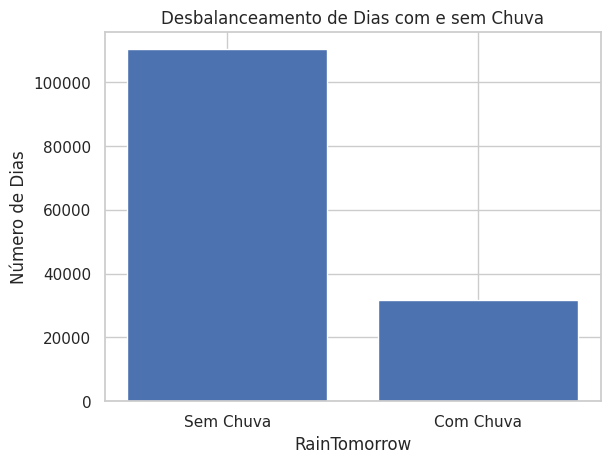

In [ ]:
rain_counts = df['RainTomorrow'].value_counts()
plt.bar(rain_counts.index, rain_counts.values)
plt.xlabel('RainTomorrow')
plt.ylabel('Número de Dias')
plt.title('Desbalanceamento de Dias com e sem Chuva')
plt.xticks(rain_counts.index, ['Sem Chuva', 'Com Chuva'])

plt.show()


Tradução do título das Features para Português

In [ ]:
colunas = {'Date': 'Data','Location':'Localizacao', 'MinTemp': 'Temperatura_minima', 'MaxTemp':'Temperatura_maxima', 'Rainfall':'Chuva(mm)','WindGustDir':'Direcao_vento', 'WindGustSpeed':'Velocidade_vento', 'WindDir9am':'Direcao_vento_09h', 'WindDir3pm':'Direcao_vento_15h',
       'WindSpeed9am':'Velocidade_vento_09h', 'WindSpeed3pm':'Velocidade_vento_15h', 'Humidity9am':'Humidade_09h', 'Humidity3pm':'Humidade_15h',
       'Pressure9am':'Pressao_atmosferica_09h', 'Pressure3pm':'Pressao_atmosferica_15h','Temp9am':'Temperatura_09h',
       'Temp3pm':'Temperatura_15h', 'RainToday':'Choveu', 'RainTomorrow': 'Choveu_dia_seguinte'
}

df.rename(columns=colunas, inplace=True)

Direção do vento não será necessária

In [ ]:
df = df.drop(['Direcao_vento', 'Direcao_vento_09h', 'Direcao_vento_15h'],axis=1)

Criando Feature de Estado

In [ ]:
cidades_e_estados = {
    'Cobar': 'New South Wales',
    'CoffsHarbour': 'New South Wales',
    'Moree': 'New South Wales',
    'NorfolkIsland': 'New South Wales',
    'Sydney': 'New South Wales',
    'SydneyAirport': 'New South Wales',
    'WaggaWagga': 'New South Wales',
    'Williamtown': 'New South Wales',
    'Canberra': 'Australian Capital Territory',
    'Sale': 'Vitoria',
    'MelbourneAirport': 'Vitoria',
    'Melbourne': 'Vitoria',
    'Mildura': 'Vitoria',
    'Portland': 'Vitoria',
    'Watsonia': 'Vitoria',
    'Brisbane': 'Queensland',
    'Cairns': 'Queensland',
    'Townsville': 'Queensland',
    'MountGambier': 'South Australia',
    'Nuriootpa': 'South Australia',
    'Woomera': 'South Australia',
    'PerthAirport': 'Western Australia',
    'Perth': 'Western Australia',
    'Hobart': 'Tasmania',
    'AliceSprings': 'Northern Territory',
    'Darwin': 'Northern Territory',
    'Albury': 'New South Wales',
    'BadgerysCreek': 'New South Wales',
    'Newcastle': 'New South Wales',
    'NorahHead': 'New South Wales',
    'Penrith': 'New South Wales',
    'Richmond': 'New South Wales',
    'Wollongong': 'New South Wales',
    'Tuggeranong': 'Australian Capital Territory',
    'MountGinini': 'Australian Capital Territory',
    'Ballarat': 'Vitoria',
    'Bendigo': 'Vitoria',
    'Nhil': 'Vitoria',
    'Dartmoor': 'Vitoria',
    'GoldCoast': 'Queensland',
    'Adelaide': 'South Australia',
    'Albany': 'Western Australia',
    'Witchcliffe': 'Western Australia',
    'PearceRAAF': 'Western Australia',
    'SalmonGums': 'Western Australia',
    'Walpole': 'Western Australia',
    'Launceston': 'Tasmania',
    'Katherine': 'Northern Territory',
    'Uluru': 'Northern Territory'

}
df['Estado'] = df['Localizacao'].map(cidades_e_estados)

#Data Cleaning

Retirando Valores nulos das Features de Saída

In [ ]:
df=df.dropna(subset=['Choveu', 'Choveu_dia_seguinte'])

In [ ]:
df['Choveu'] = df['Choveu'].astype('int64')
df['Choveu_dia_seguinte'] = df['Choveu_dia_seguinte'].astype('int64')

In [ ]:
from sklearn.impute import SimpleImputer

entradas_objects = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
entradas_medias = SimpleImputer(missing_values = np.nan, strategy = 'mean')

In [ ]:
df.Temperatura_minima = entradas_medias.fit_transform(df[["Temperatura_minima"]])
df.Temperatura_maxima = entradas_medias.fit_transform(df[["Temperatura_maxima"]])
df.Velocidade_vento = entradas_medias.fit_transform(df[["Velocidade_vento"]])
df.Velocidade_vento_09h = entradas_medias.fit_transform(df[["Velocidade_vento_09h"]])
df.Velocidade_vento_15h = entradas_medias.fit_transform(df[["Velocidade_vento_15h"]])
df.Humidade_09h = entradas_medias.fit_transform(df[["Humidade_09h"]])
df.Humidade_15h = entradas_medias.fit_transform(df[["Humidade_15h"]])
df.Pressao_atmosferica_09h = entradas_medias.fit_transform(df[["Pressao_atmosferica_09h"]])
df.Pressao_atmosferica_15h = entradas_medias.fit_transform(df[["Pressao_atmosferica_15h"]])
df.Temperatura_09h = entradas_medias.fit_transform(df[["Temperatura_09h"]])
df.Temperatura_15h = entradas_medias.fit_transform(df[["Temperatura_15h"]])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Data                     140787 non-null  datetime64[ns]
 1   Localizacao              140787 non-null  object        
 2   Temperatura_minima       140787 non-null  float64       
 3   Temperatura_maxima       140787 non-null  float64       
 4   Chuva(mm)                140787 non-null  float64       
 5   Velocidade_vento         140787 non-null  float64       
 6   Velocidade_vento_09h     140787 non-null  float64       
 7   Velocidade_vento_15h     140787 non-null  float64       
 8   Humidade_09h             140787 non-null  float64       
 9   Humidade_15h             140787 non-null  float64       
 10  Pressao_atmosferica_09h  140787 non-null  float64       
 11  Pressao_atmosferica_15h  140787 non-null  float64       
 12  Temperatura_09h 

In [ ]:
df['Ano'] = df['Data'].dt.year
df['Mes'] = df['Data'].dt.month
df['Ano'] = df['Ano'].map(lambda x: x)
df['Mes'] = df['Mes'].map(lambda x: x)


In [ ]:
categoricas=['Localizacao', 'Estado']
df_dummies = df.drop(['Data'],axis=1)
df_dummies = pd.get_dummies(df, columns=categoricas)

In [ ]:
df_tratado = df.drop(['Data','Localizacao', 'Estado', 'Ano'],axis=1)

In [ ]:
df_tratado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Temperatura_minima       140787 non-null  float64
 1   Temperatura_maxima       140787 non-null  float64
 2   Chuva(mm)                140787 non-null  float64
 3   Velocidade_vento         140787 non-null  float64
 4   Velocidade_vento_09h     140787 non-null  float64
 5   Velocidade_vento_15h     140787 non-null  float64
 6   Humidade_09h             140787 non-null  float64
 7   Humidade_15h             140787 non-null  float64
 8   Pressao_atmosferica_09h  140787 non-null  float64
 9   Pressao_atmosferica_15h  140787 non-null  float64
 10  Temperatura_09h          140787 non-null  float64
 11  Temperatura_15h          140787 non-null  float64
 12  Choveu                   140787 non-null  int64  
 13  Choveu_dia_seguinte      140787 non-null  int64  
 14  Mes 

Visualização da correlação entre as Features

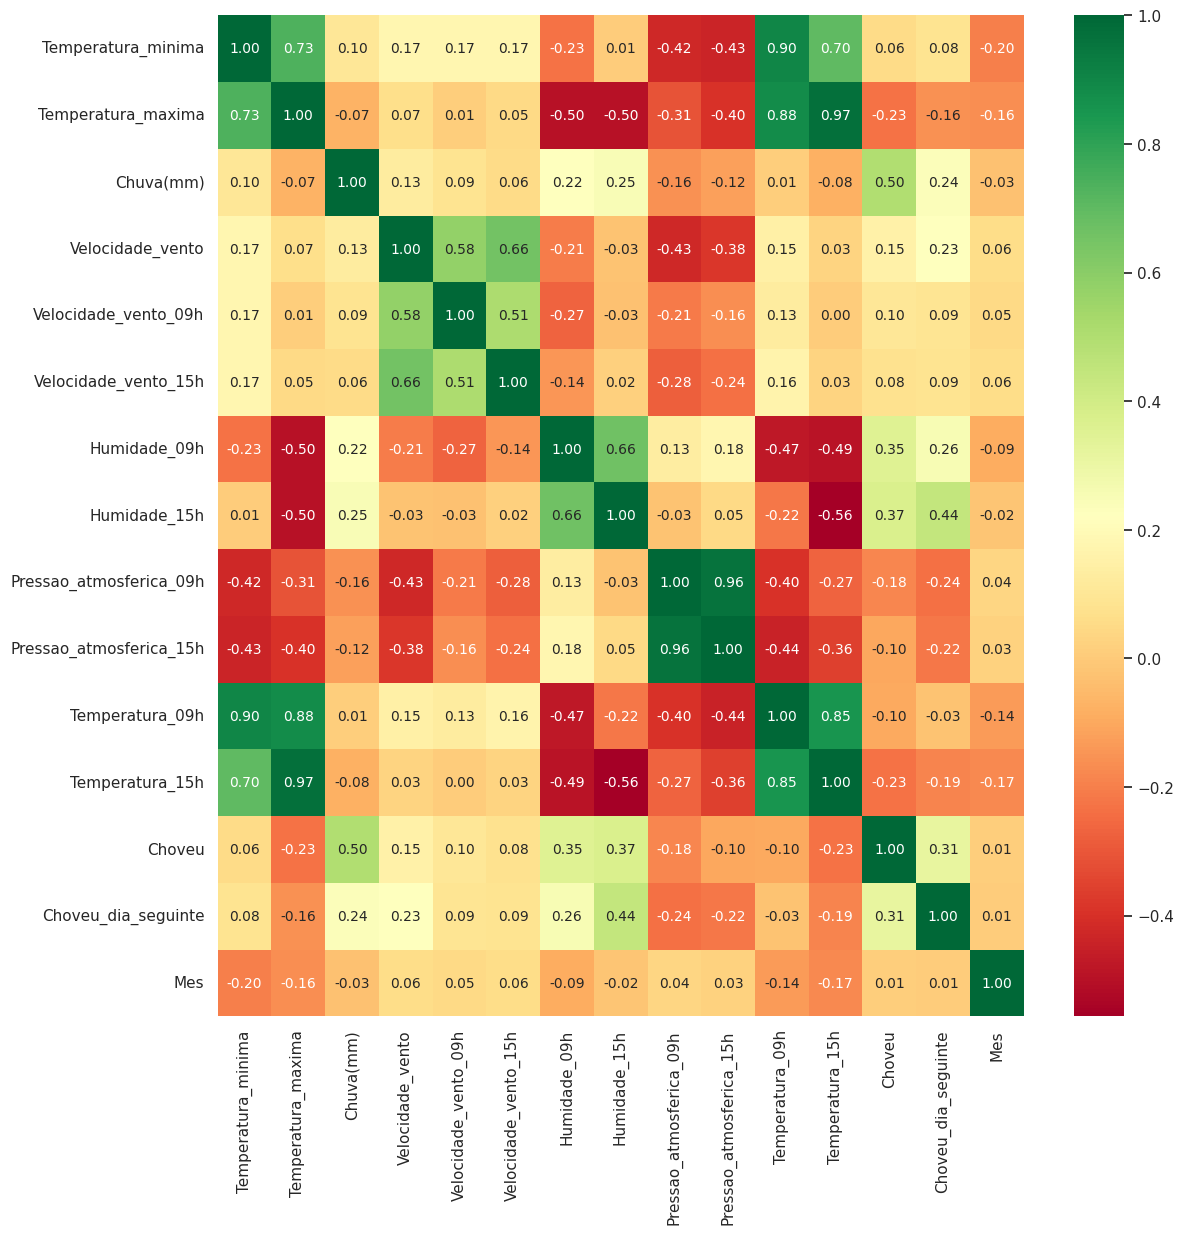

In [ ]:
df_corr = df_tratado.corr()
f, ax = plt.subplots(figsize=(13, 13))

sns.heatmap(df_corr, annot=True, fmt='.2f', cmap='RdYlGn',annot_kws={'size': 10}, ax=ax)
plt.show()



Retirada de Features com correlação baixa, ou negativa

In [ ]:
apagar=['Temperatura_minima', 'Temperatura_maxima', 'Velocidade_vento_15h','Velocidade_vento_09h', 'Pressao_atmosferica_09h',
        'Pressao_atmosferica_15h','Temperatura_09h', 'Temperatura_15h']

df_dummies  = df.drop(apagar, axis=1)

Verificação estatística dos dados.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperatura_minima,140787.0,12.184824,6.393226,-8.5,7.6,12.000000,16.8,33.9
Temperatura_maxima,140787.0,23.235120,7.106739,-4.8,17.9,22.700000,28.2,48.1
Chuva(mm),140787.0,2.349974,8.465173,0.0,0.0,0.000000,0.8,371.0
Velocidade_vento,140787.0,39.970520,13.131794,6.0,31.0,39.000000,46.0,135.0
Velocidade_vento_09h,140787.0,13.990496,8.852853,0.0,7.0,13.000000,19.0,130.0
Velocidade_vento_15h,140787.0,18.631141,8.718653,0.0,13.0,18.631141,24.0,87.0
Humidade_09h,140787.0,68.826833,18.960664,0.0,57.0,70.000000,83.0,100.0
Humidade_15h,140787.0,51.449288,20.546968,0.0,37.0,51.449288,65.0,100.0
Pressao_atmosferica_09h,140787.0,1017.654577,6.749189,980.5,1013.5,1017.654577,1021.8,1041.0
Pressao_atmosferica_15h,140787.0,1015.257963,6.682526,977.1,1011.0,1015.257963,1019.4,1039.6


Outliers

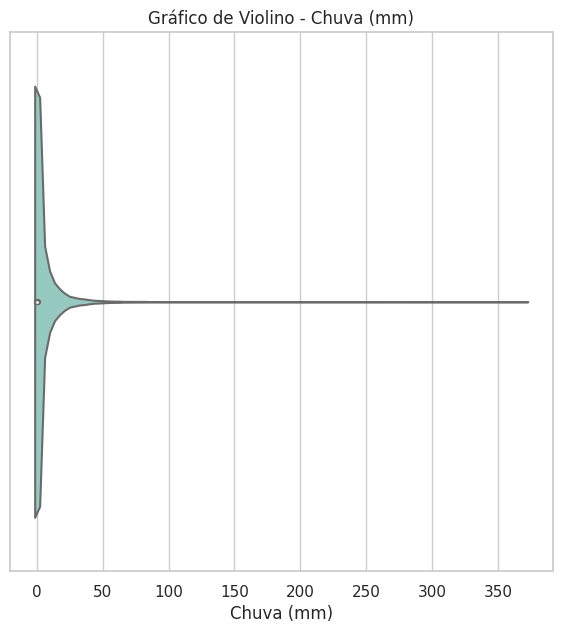

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(7, 7))
sns.violinplot(x='Chuva(mm)', data=df, palette="Set3")
plt.title('Gráfico de Violino - Chuva (mm)')
plt.xlabel('Chuva (mm)')
plt.show()

Conversão das features em dummies para trabalhar com dados categoricos

In [ ]:
df_dummies = df.drop(categoricas, axis=1)

In [ ]:
df_dummies=df_dummies.drop(['Data'],axis=1)

In [ ]:
x,y=df_dummies.drop(["Choveu_dia_seguinte"],axis=1),df['Choveu_dia_seguinte']

In [ ]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2)

print('Treinamento de X: ', x_treino.shape)
print('Treinamento de y: ', y_treino.shape)
print('Teste de X: ', x_teste.shape)
print('Teste de y: ', y_teste.shape)

Treinamento de X:  (112629, 15)
Treinamento de y:  (112629,)
Teste de X:  (28158, 15)
Teste de y:  (28158,)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Acurácia: 0.8397258328006251
Precisão: 0.7331619537275065


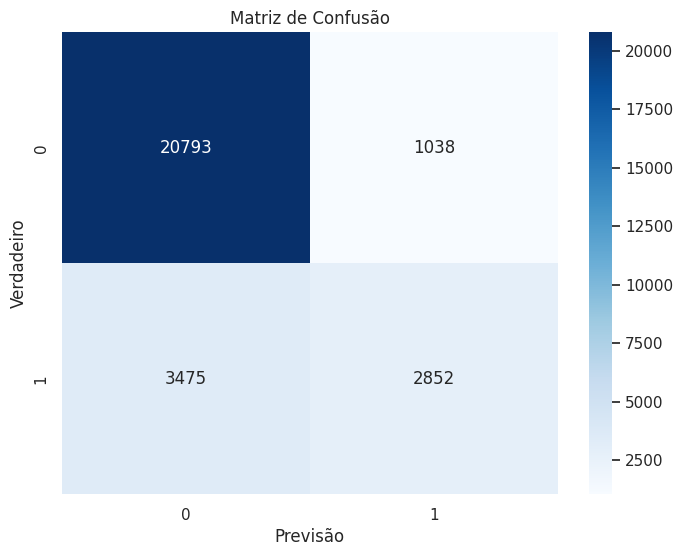

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

x = df.drop('Choveu_dia_seguinte', axis=1)
y = df['Choveu_dia_seguinte']

# Modelo
clf = LogisticRegression(random_state=42)

# Treinamento
clf.fit(x_treino, y_treino)

# Previsões
y_previsto = clf.predict(x_teste)

# Acurácia
accuracy = accuracy_score(y_teste, y_previsto)
print("Acurácia:", accuracy)

#Precisão
precisao = precision_score(y_teste, y_previsto)
print("Precisão:", precisao)


# Matriz de confusão
conf_matrix = confusion_matrix(y_teste, y_previsto)

# Gráfico de Matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()
